<a href="https://colab.research.google.com/github/yweslakarep123/Retinopathy_classification/blob/main/Rethinopathy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retinopathy is an eye disorder that affects the blood vessels in the retina, often resulting in vision alterations or blindness. Diabetic patients are particularly susceptible to this condition.

This dataset contains 4 continuous features: age, systolic blood pressure, diastolic blood pressure and cholesterol and a binary variable has_retinopathy.

Dataset can be used to create ML models to predict risk of developing retinopathy in diabetic patients.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!chmod 600 /content/kaggle.json

In [5]:
!kaggle datasets download -d maneshkokare/retinopathy-dataset

Dataset URL: https://www.kaggle.com/datasets/maneshkokare/retinopathy-dataset
License(s): CC0-1.0
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 86.6MB/s]


In [6]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 3.0 MB/s eta 0:00:00


In [12]:
from pyunpack import Archive
zip_file_path = '/content/retinopathy-dataset.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
file_path = '/content/drive/MyDrive/Test_dataset/Retinopathy Dataset'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head()


,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
0,77.196340,85.288742,80.021878,79.957109,1.0
1,63.529850,99.379736,84.852361,110.382411,1.0
2,69.003986,111.349455,109.850616,100.828246,1.0
3,82.638210,95.056128,79.666851,87.066303,1.0
4,78.346286,109.154591,90.713220,92.511770,1.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       6000 non-null   float64
 1   systolic_blood_pressure   6000 non-null   float64
 2   diastolic_blood_pressure  6000 non-null   float64
 3   cholesterol               6000 non-null   float64
 4   has_retinopathy           6000 non-null   float64
dtypes: float64(5)
memory usage: 234.5 KB


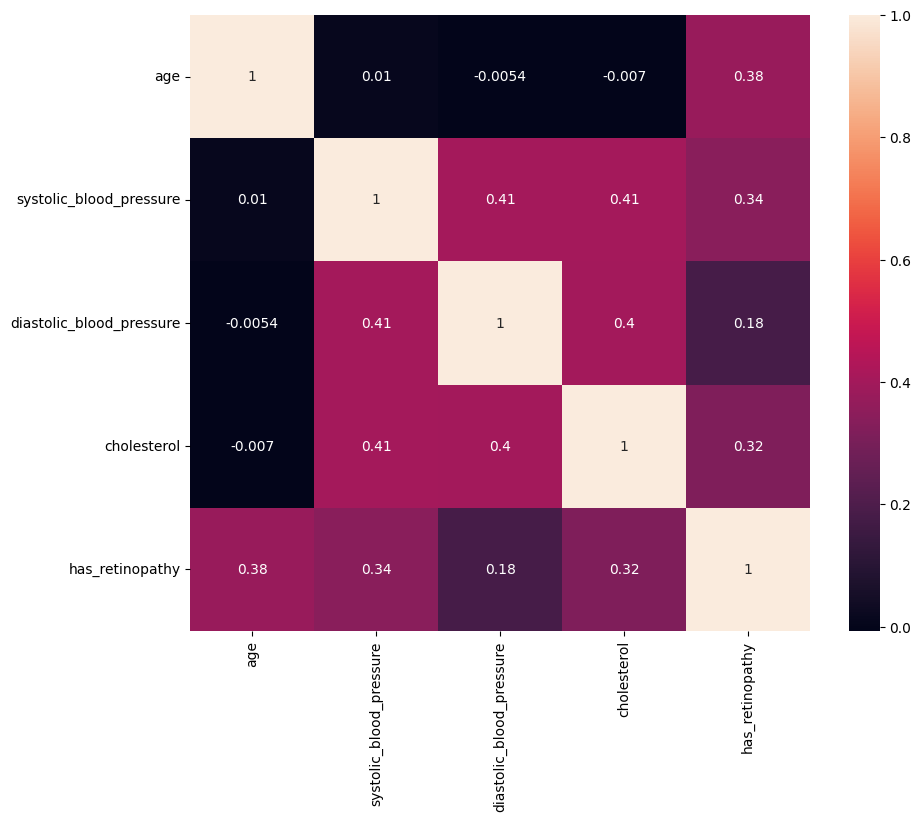

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [47]:
feature = data.drop(['has_retinopathy'], axis =1)
target = data['has_retinopathy']

In [48]:
feature.head()

,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [49]:
target.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: has_retinopathy, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.svm import LinearSVC

In [102]:
modelSVC = LinearSVC(random_state=42, dual=False)
modelSVC.fit(X_train_scaled, y_train)

LinearSVC(dual=False, random_state=42)

In [103]:
y_pred_SVC = modelSVC.predict(X_test_scaled)

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_SVC))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_SVC))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       575
         1.0       0.76      0.75      0.75       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200


Confusion Matrix:
[[429 146]
 [159 466]]


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the hyperparameter grid for LinearSVC
param_grid = {
    'modelSVC__C': [0.1, 1, 10, 100],
    'modelSVC__tol': [1e-4, 1e-3, 1e-2, 1e-1],
    'modelSVC__max_iter': [1000, 2000, 3000, 4000],
    'modelSVC__dual': [False, True]# Ensure these values are reasonable
}

# Create a pipeline with scaling and the LinearSVC model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling is important for SVMs
    ('modelSVC', modelSVC)
])

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',  # Use accuracy for classification
                           n_jobs=-1,
                           verbose=5,
                           return_train_score=True)

In [106]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('modelSVC',
                                        LinearSVC(dual=False,
                                                  random_state=42))]),
             n_jobs=-1,
             param_grid={'modelSVC__C': [0.1, 1, 10, 100],
                         'modelSVC__dual': [False, True],
                         'modelSVC__max_iter': [1000, 2000, 3000, 4000],
                         'modelSVC__tol': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [107]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'modelSVC__C': 1, 'modelSVC__dual': False, 'modelSVC__max_iter': 1000, 'modelSVC__tol': 0.1}
Best score found:  0.7441666666666666


In [108]:
best_model_SVC = grid_search.best_estimator_

In [109]:
y_pred = best_model_SVC.predict(X_test_scaled)

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74       575
         1.0       0.76      0.74      0.75       625

    accuracy                           0.74      1200
   macro avg       0.74      0.75      0.74      1200
weighted avg       0.75      0.74      0.75      1200


Confusion Matrix:
[[429 146]
 [160 465]]


In [111]:
import joblib
model_filename = 'SVC_retinopathy_model.pkl'
joblib.dump(modelSVC, model_filename)
print(f'Model saved to {model_filename}')

Model saved to SVC_retinopathy_model.pkl
